<a href="https://colab.research.google.com/github/Sharaffin/Netflix-Movies-and-TV-Shows-/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **1. Connection with the Data.**

At first, we import the libraries or functions for making our analysis easy and then get connected to the set of outcomes.

In [2]:
# Taking help of the Following Libraries
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


%matplotlib inline

In [3]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [5]:
# top 5 rows of dataset 
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
#last 5 rows of the dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
# Total number of rows and columns of dataset
df.shape

(7787, 12)

In [8]:
#statistical details like percentile, mean, std, max etc.
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [9]:
# data types and null count of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

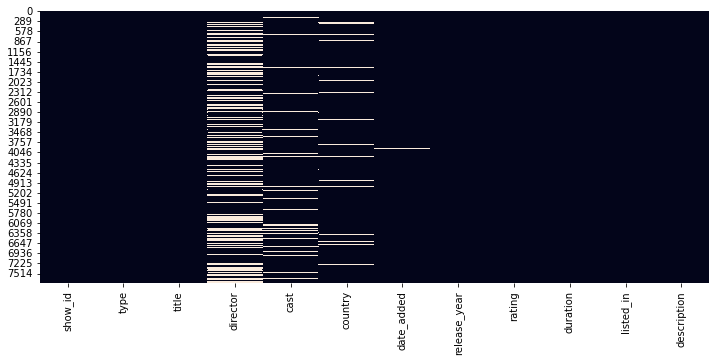

In [11]:
# plotting the data with respect to analyse null values in the data
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=False)

In [12]:
filtered_directors = df[df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

In [14]:
filtered_directors

title
7:19                                       Jorge Michel Grau
23:59                                           Gilbert Chan
9                                                Shane Acker
21                                            Robert Luketic
46                                               Serdar Akar
                                                 ...        
Zoo                                             Shlok Sharma
Zoom                                            Peter Hewitt
Zozo                                             Josef Fares
Zubaan                                           Mozez Singh
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS             Sam Dunn
Length: 6115, dtype: object

In [13]:
filtered_cast = df[df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

In [15]:
filtered_cast

title
3%                                 João Miguel
3%                            Bianca Comparato
3%                                Michel Gomes
3%                             Rodolfo Valente
3%                             Vaneza Oliveira
                                 ...          
Zubaan                          Anita Shabdish
Zubaan                   Chittaranjan Tripathy
Zulu Man in Japan                      Nasty C
Zumbo's Just Desserts            Adriano Zumbo
Zumbo's Just Desserts              Rachel Khoo
Length: 55955, dtype: object

In [17]:
df['director'].fillna(df['director'].mode()[0], inplace=True)

In [18]:
#removing rows with nan values
df = df[df['date_added'].notna()]

In [19]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])

In [20]:
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [21]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,"Raúl Campos, Jan Suter","João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


# **EDA**

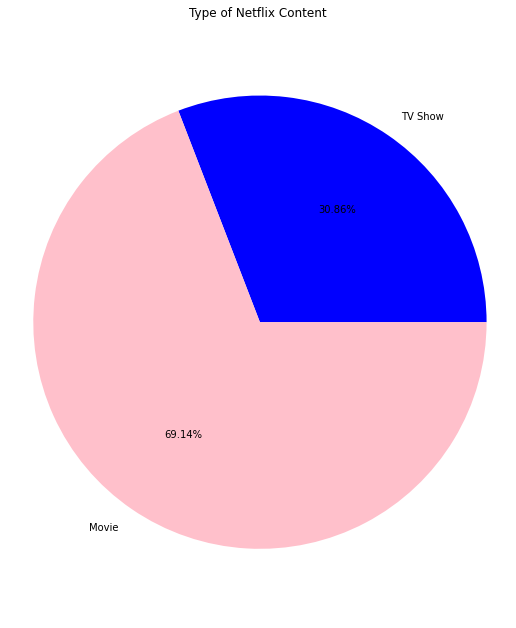

In [24]:
#plotting pie chart on type feature
plt.figure(figsize=(9, 11))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,
        autopct='%1.2f%%',colors=['blue','pink'])
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

Finding number of movies and TV shows

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


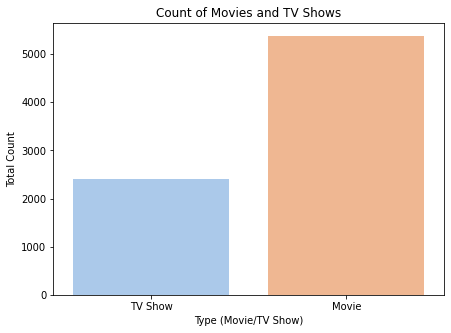

In [25]:
plt.figure(figsize=(7,5))
g = sns.countplot(df.type, palette="pastel");
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()

In [26]:
#Counting number of movies and TV shows with respect to year
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]
year_df = df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"}).sort_values(by=['year'])
movies_year_df = df_movies.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"}).sort_values(by=['year'])
shows_year_df = df_tv.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"}).sort_values(by=['year'])
year_df.sort_values(by=['year'])

,year,count
11,2008,2
12,2009,2
13,2010,1
8,2011,13
10,2012,3
9,2013,11
7,2014,25
6,2015,88
4,2016,443
3,2017,1225


Analysing number movie and tv show in a year

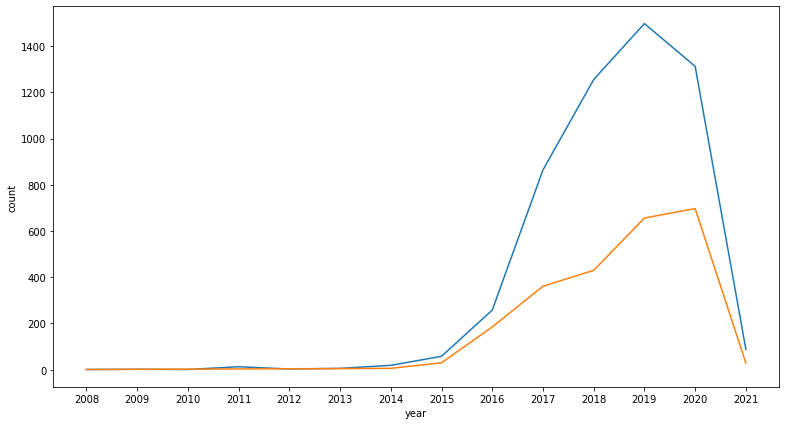

In [27]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=movies_year_df,x='year',y='count')
sns.lineplot(data=shows_year_df,x='year',y='count')
#ax.set_xticks(np.arange(2008, 2020, 1))
#plt.title(“Total content added across all years (up to 2019)”)
##plt.legend([‘Total’,’Movie’,’TV Show’])
#plt.ylabel(“Releases”)
#plt.xlabel(“Year”)
plt.show()

Blue- TV show

Orange- Movies

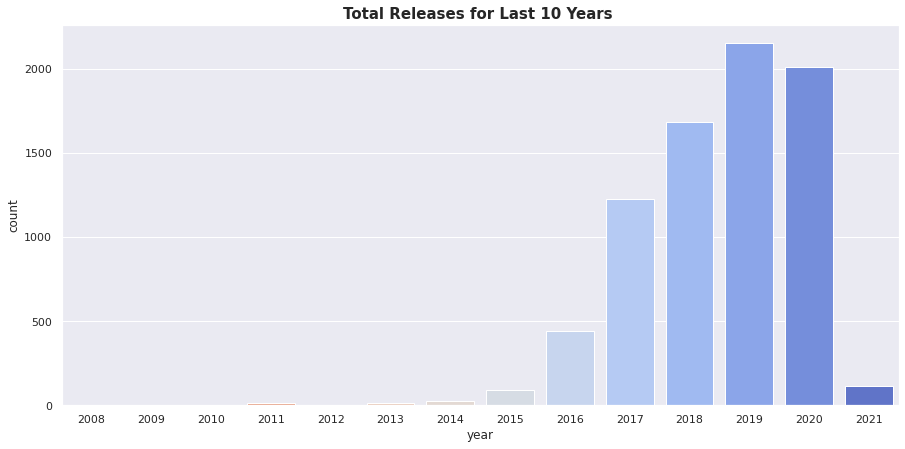

In [28]:
# Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(x="year",data=year_df,palette="coolwarm_r",y='count')

plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")    
plt.show()

In [ ]:
#Counting movies and TV show

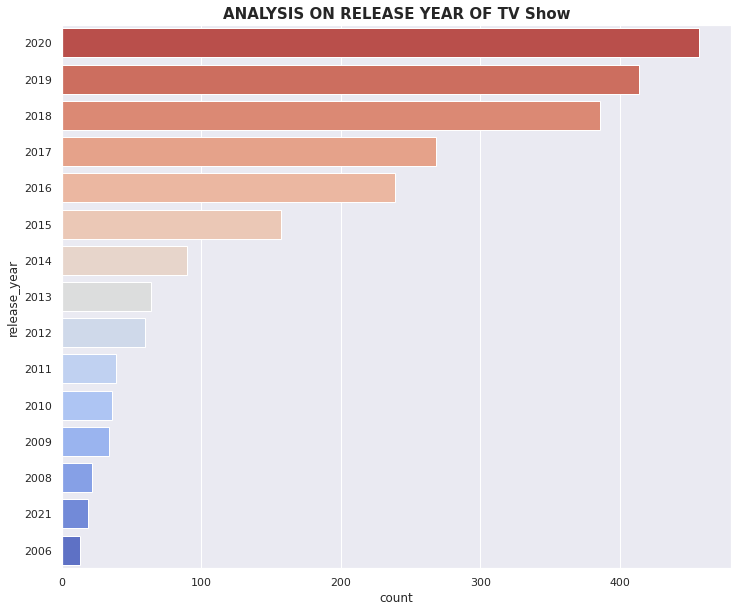

In [29]:
#plotting release year of TV show
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_tv, palette="coolwarm_r", order=df_tv['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

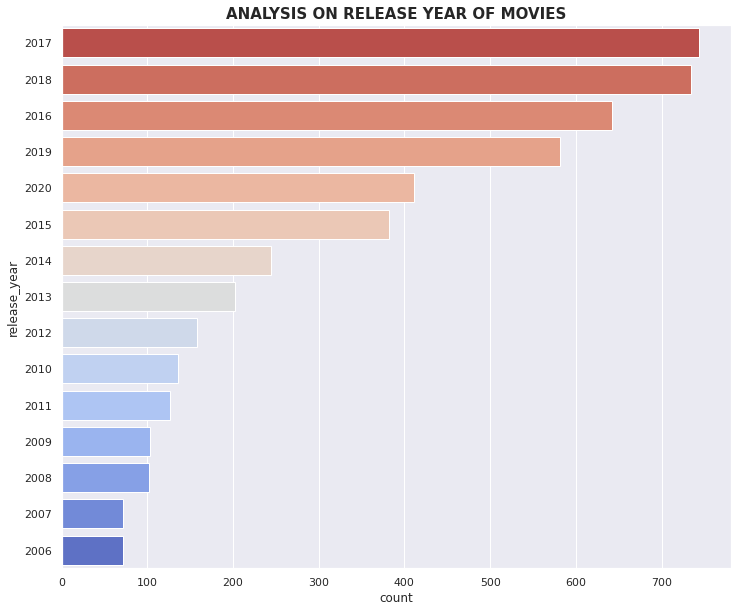

In [30]:
#plotting release year of movies
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_movies, palette="coolwarm_r", order=df_movies['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()


Counting number tv show and movies with respect to country

In [31]:
df['country'].value_counts().head(10)

United States     3055
India              923
United Kingdom     396
Japan              225
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: country, dtype: int64

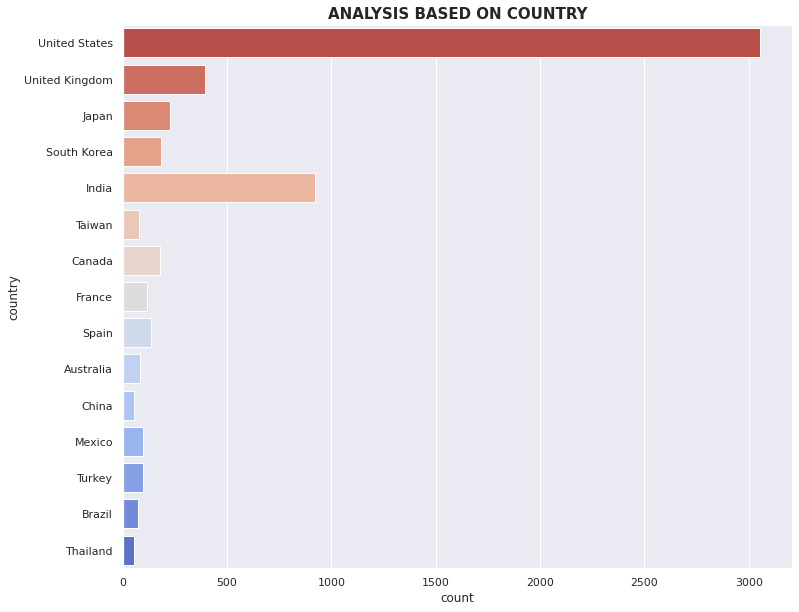

In [32]:
#plotting release year of TV show
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="country", data=df, palette="coolwarm_r", order=df_tv['country'].value_counts().index[0:15])

plt.title('ANALYSIS BASED ON COUNTRY', fontsize=15, fontweight='bold')
plt.show()

Top 10 director whose content is available in netflix

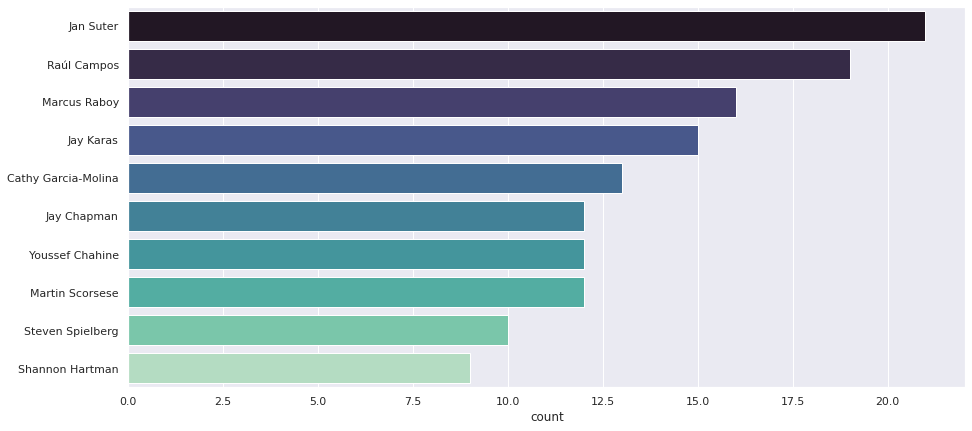

In [33]:
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='mako')
plt.show()

Top 10 actors whose content is available in netflix

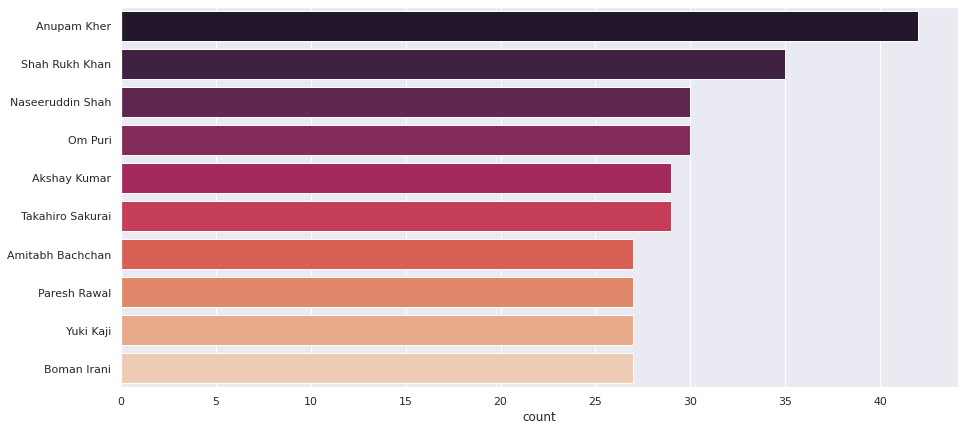

In [34]:
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='rocket')
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7059 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
 12  year_added    7777 non-null   object
dtypes: int64(1), object(12)
memory usage: 1.1+ MB


In [36]:
df_tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,"Raúl Campos, Jan Suter","João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017
11,s12,TV Show,1983,"Raúl Campos, Jan Suter","Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019
16,s17,TV Show,Feb-09,"Raúl Campos, Jan Suter","Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",United States,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019


Group by TV rating and movie rating to get insight

In [37]:
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)

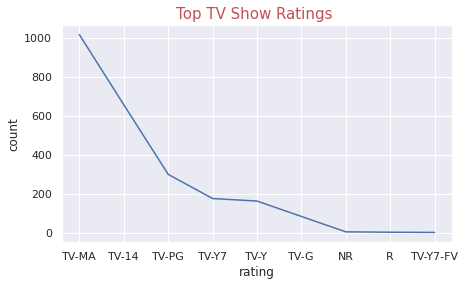

In [38]:
#linetplot on top tv show ratings 
fig_dims = (7,4)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.lineplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings ',size='15',color='r')
plt.show()

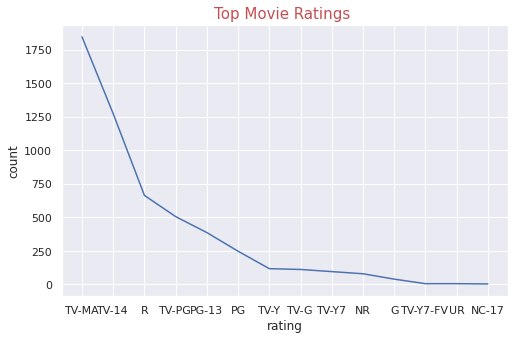

In [39]:
#linetplot on top movie ratings
movie_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.lineplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings ',size='15',color='r')
plt.show()

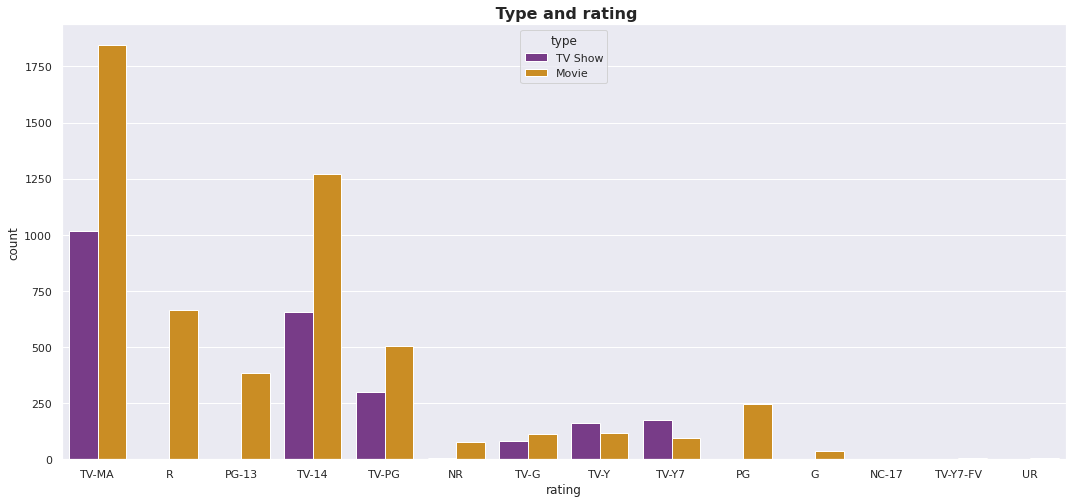

In [40]:
# Rating
plt.figure(figsize=(18,8))
sns.countplot(x='rating',hue='type',data=df,palette="CMRmap")
plt.title(' Type and rating',size='16',fontweight="bold")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


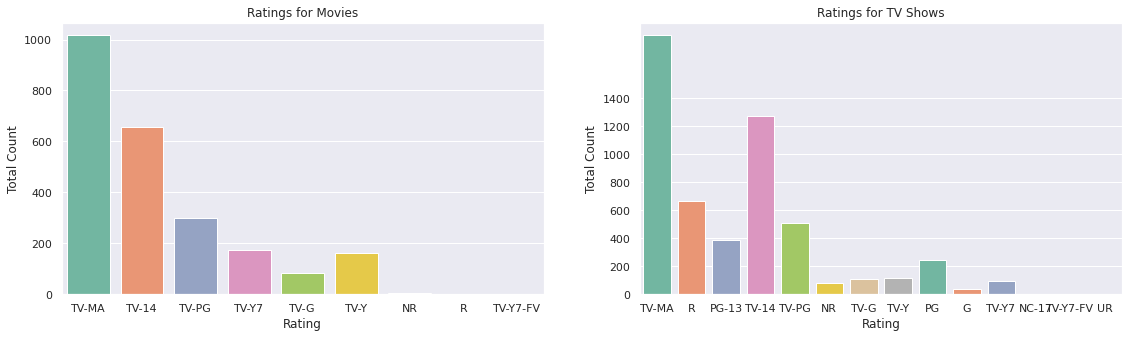

In [41]:
#for TV show and movies individually
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(df_tv.rating,palette="Set2", ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")
g2 = sns.countplot(df_movies.rating,palette="Set2", ax=ax[1]);
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
fig.show()

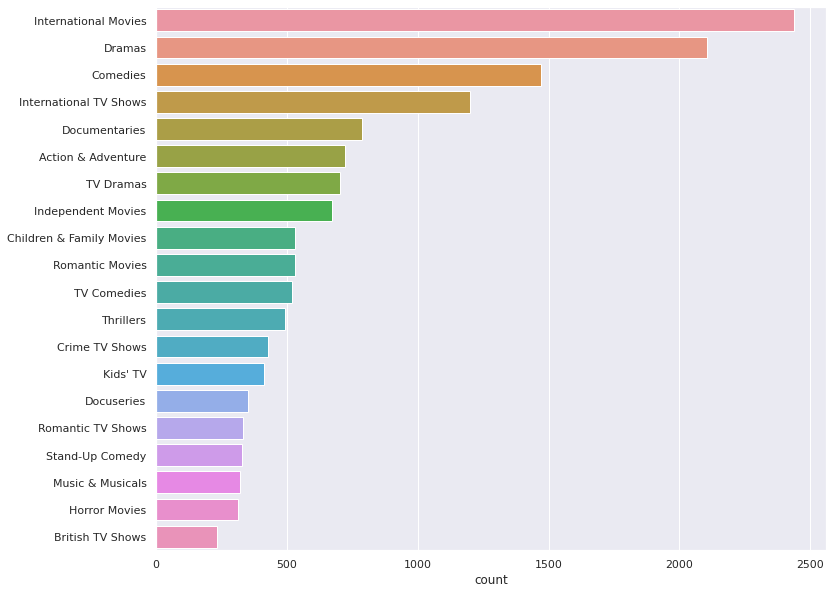

In [42]:
#plotting content 
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(12,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])

International movies and drama has highest number of content

Top genre added in netflix

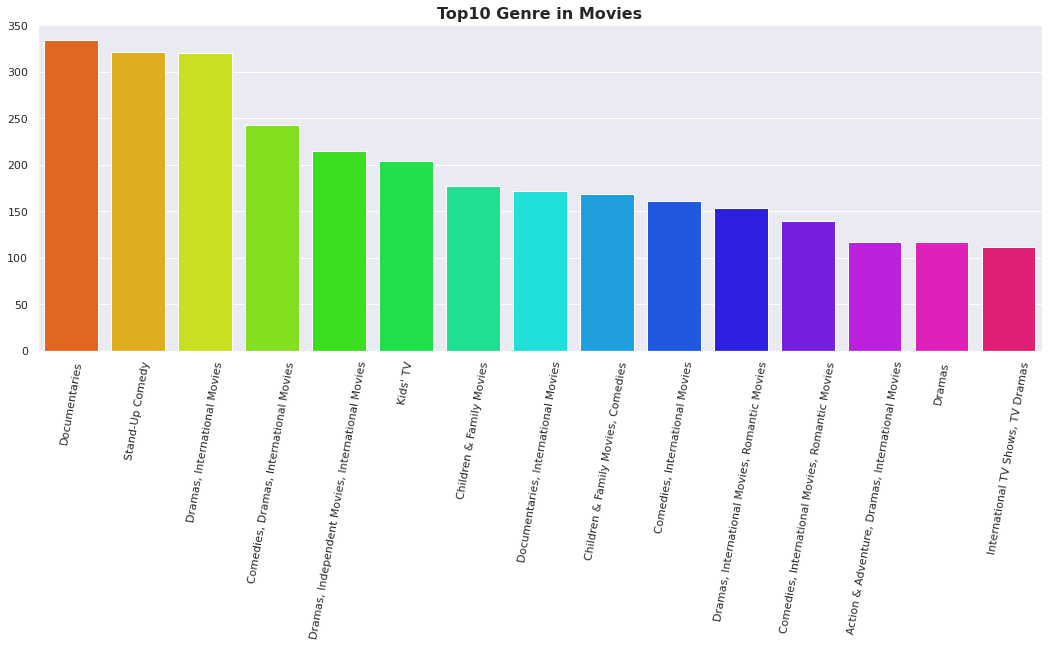

In [43]:
# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x = df["listed_in"].value_counts().head(15).index,
            y = df["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

Creating a new feature month to analyse data on monthly basis

In [44]:
df["month"]=df['date_added'].str.split(' ').str[0]
df_month = df.groupby(["month"])['show_id'].count().reset_index(name = 'count')
df_month=df_month.drop([0])
df_month

,month,count
1,April,596
2,August,612
3,December,817
4,February,466
5,January,746
6,July,592
7,June,538
8,March,661
9,May,537
10,November,730


In [45]:
sort_dict = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_month['month']=pd.Categorical(df_month['month'],categories=sort_dict)
#df_month=df_month.reset_index(drop=True)
#df_month=df_month.sort_values(by='month')
df_month.sort_values(by='month',inplace=True)
df_month

,month,count
5,January,746
4,February,466
8,March,661
1,April,596
9,May,537
7,June,538
6,July,592
2,August,612
12,September,614
11,October,780


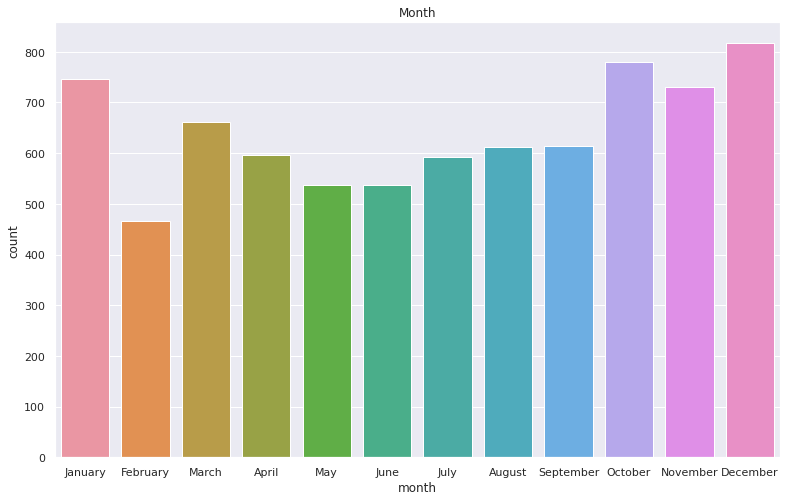

In [46]:
#content added monthwise
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='month',y='count',data=df_month)

we can see that, In netflix maximum content added in December and minimum in february

Released content in different countries

In [47]:
#content avaliable in different countries
ab = df.groupby('type')['country'].value_counts()

In [48]:
#Type movie available in different countries
ab.head(25)

type   country                      
Movie  United States                    2080
       India                             852
       United Kingdom                    193
       Canada                            118
       Egypt                              89
       Spain                              89
       Turkey                             73
       Philippines                        70
       France                             69
       Japan                              69
       Indonesia                          68
       Mexico                             65
       Nigeria                            62
       United Kingdom, United States      52
       Hong Kong                          49
       Brazil                             46
       Germany                            42
       United States, Canada              38
       Australia                          37
       South Korea                        36
       Thailand                           35
       Argentina  

In [ ]:
#Corelation Heatmap for Release year and Month

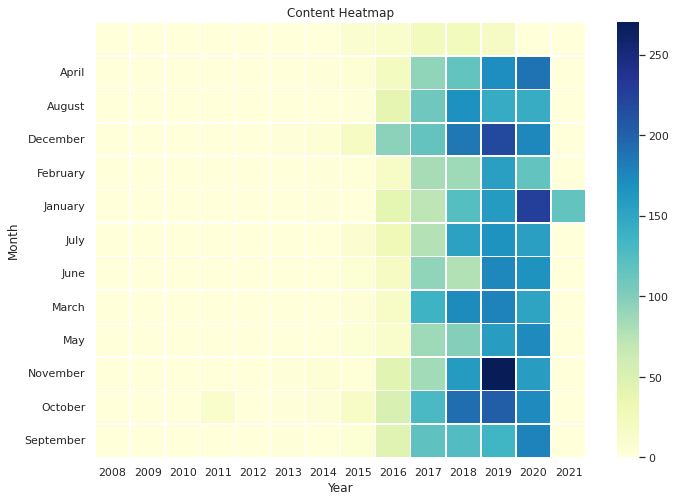

In [49]:
#Corelation Heatmap 
month_year_df = df.groupby('year_added')['month'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11,8))
sns.heatmap(month_year_df, linewidths=.5, cmap="YlGnBu")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

we can see that around 2014 is when Netflix began to increase their content count. We can see over the years and months, Netflix continues to slowly increase the amount of content that is being added into their platform. We can see in 2020, the data stops at January since that is the latest month available in the dataset.

In [50]:
df.columns.values

array(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'year_added', 'month'], dtype=object)

Available movies and tv show for different age groups in top 10 countries

In [51]:
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

country_order = df['principal_country'].value_counts()[:11].index
content_data = df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

In [52]:
# Creating new column for age rating
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['age_rating'] = df['rating'].replace(rating_ages)
df['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids', nan],
      dtype=object)

In [53]:
df['count'] = 1
data = df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']

df_heatmap = df.loc[df['principal_country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['principal_country'], df_heatmap['age_rating'],normalize = "index").T
df_heatmap

principal_country,Australia,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
age_rating,,,,,,,,,,
Adults,0.490566,0.467181,0.627551,0.259414,0.365957,0.764228,0.463918,0.797619,0.526042,0.463155
Kids,0.132075,0.150579,0.086735,0.015690,0.008511,0.016260,0.046392,0.035714,0.078125,0.089080
Older Kids,0.216981,0.220077,0.112245,0.163180,0.276596,0.089431,0.123711,0.053571,0.184028,0.202131
Teens,0.028302,0.027027,0.030612,0.004184,0.012766,0.016260,0.000000,0.017857,0.071181,0.084640
Young Adults,0.132075,0.135135,0.142857,0.557531,0.336170,0.113821,0.365979,0.095238,0.140625,0.160994


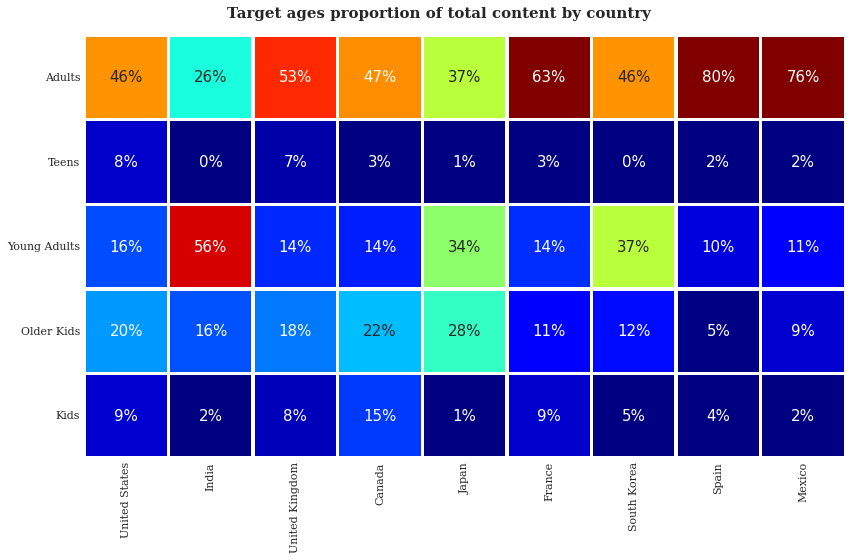

In [54]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="jet",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

This shows that the available content in different countries is maximum for adults